In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

import sys
sys.path.insert(1, '../scripts/')
from utils import *
from identification import *
from findSpine import *

In [16]:
img = cv.imread('../pictures/webcam4.jpg')

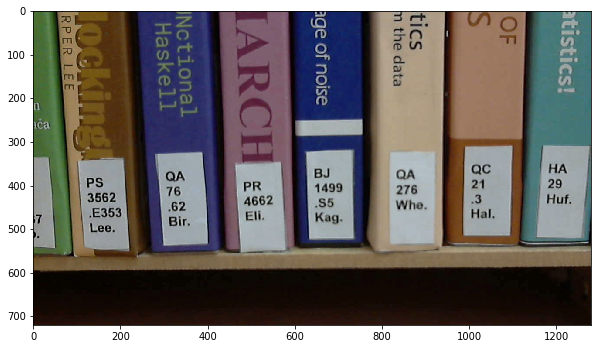

True

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(img[:,:,::-1])
plt.show()
cv.imwrite('demo0.jpg', img)

In [18]:
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_downsampled = None
img_downsampled = cv.pyrDown(img_grey, img_downsampled)  # Downsample - scale factor 2
img_canny_edge = cv.Canny(img_downsampled, 50, 50)

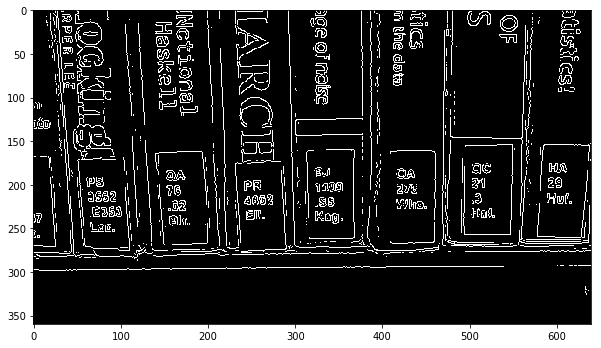

True

In [19]:
plt.figure(figsize=(10,8))
plt.imshow(img_canny_edge, cmap='gray')
plt.show()
cv.imwrite('demo1.jpg', img_canny_edge)

In [20]:
hough_lines = cv.HoughLines(image=img_canny_edge, rho=1, theta=np.pi / 180, threshold=100)

In [21]:
all_lines = []
boundary_lines = []
for hough_line in hough_lines:
        rho = hough_line[0][0]
        theta = hough_line[0][1]
        all_lines.append(Line(theta, 2 * rho))
        # Keep only lines that are vertical or almost vertical
        if abs(theta) < np.pi / 20 or abs(theta) > 19 * np.pi / 20:
            boundary_lines.append(Line(theta, 2 * rho))  # Rho is multiplied by 2 as the image used for detecting the lines is downsampled

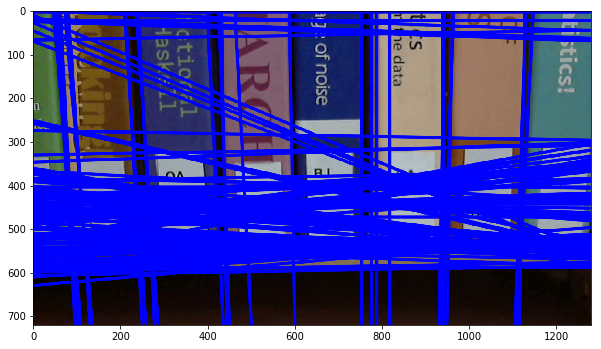

True

In [22]:
img_display = img.copy()
for line in all_lines:
    line.plotOnImage(img_display)
plt.figure(figsize=(10,8))
plt.imshow(img_display[:,:,::-1])
plt.show()
cv.imwrite('demo2.jpg', img_display)

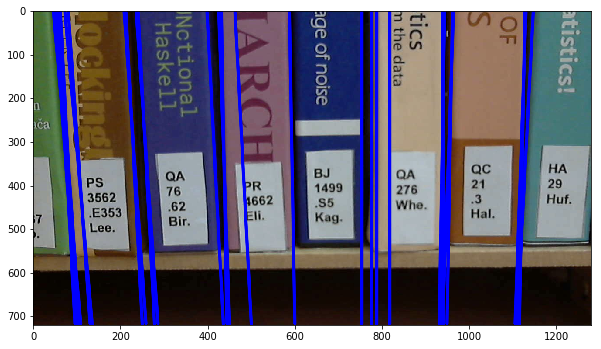

True

In [23]:
img_display = img.copy()
for line in boundary_lines:
    line.plotOnImage(img_display)
plt.figure(figsize=(10,8))
plt.imshow(img_display[:,:,::-1])
plt.show()
cv.imwrite('demo3.jpg', img_display)

In [24]:
rec = Rectangle(467, 349, 111, 196)

In [25]:
left, right = findSpineBoundaries(img, rec)

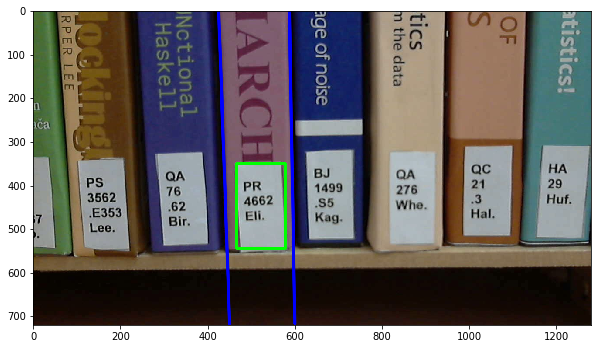

True

In [26]:
img_display = img.copy()
left.plotOnImage(img_display)
right.plotOnImage(img_display)
rec.plotOnImage(img_display)
plt.figure(figsize=(10,8))
plt.imshow(img_display[:,:,::-1])
plt.show()
cv.imwrite('demo4.jpg', img_display)